In [1]:
import pandas as pd

In [3]:
data= pd.read_csv('/content/drive/MyDrive/Practice/ECGdataset(Ass4)/ecg_autoencoder_dataset.csv', header= None)
data

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [4]:
X = data.drop(140,axis=1)
Y= data[140]
Y

0       1
1       1
2       1
3       1
4       1
       ..
4993    0
4994    0
4995    0
4996    0
4997    0
Name: 140, Length: 4998, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(X,Y, random_state=43, test_size=0.2)
x_train.shape

(3998, 140)

In [8]:
x_test.shape

(1000, 140)

In [9]:
normal_train = x_train[y_train==1]
normal_test= x_test[y_test==1]

In [10]:
fraud_test= x_test[y_test==0]
fraud_train= x_train[y_train==0]

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
encoder = Sequential()
encoder.add(Dense(140, activation = 'relu', input_shape=(140,)))
encoder.add(Dense(64, activation = 'relu'))
encoder.add(Dense(32, activation = 'relu'))
encoder.add(Dense(16, activation = 'relu'))
encoder.add(Dense(8, activation = 'relu'))

In [14]:
decoder = Sequential()
decoder.add(Dense(8, activation = 'relu', input_shape=(8,)))
decoder.add(Dense(16, activation = 'relu'))
decoder.add(Dense(32, activation = 'relu'))
decoder.add(Dense(64, activation = 'relu'))
decoder.add(Dense(140, activation = 'relu'))

In [15]:
autoencoder= Sequential([encoder,decoder])

In [16]:
autoencoder.compile(optimizer='adam', loss='msle', metrics=['mse'])

In [17]:
history= autoencoder.fit(normal_test, normal_test, epochs=20, validation_data=(x_test,x_test))

Epoch 1/20
19/19 [==============================] - 3s 24ms/step - loss: 0.1103 - mse: 0.9663 - val_loss: 0.0843 - val_mse: 0.9375
Epoch 2/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0726 - mse: 0.8483 - val_loss: 0.0764 - val_mse: 0.9013
Epoch 3/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0652 - mse: 0.8183 - val_loss: 0.0738 - val_mse: 0.8924
Epoch 4/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0636 - mse: 0.8151 - val_loss: 0.0731 - val_mse: 0.8928
Epoch 5/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0628 - mse: 0.8145 - val_loss: 0.0722 - val_mse: 0.8892
Epoch 6/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0614 - mse: 0.8111 - val_loss: 0.0708 - val_mse: 0.8862
Epoch 7/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0594 - mse: 0.8067 - val_loss: 0.0698 - val_mse: 0.8868
Epoch 8/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0580 - mse: 0.8

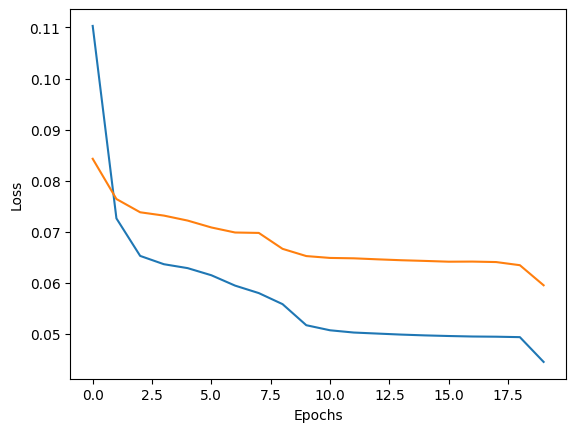

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

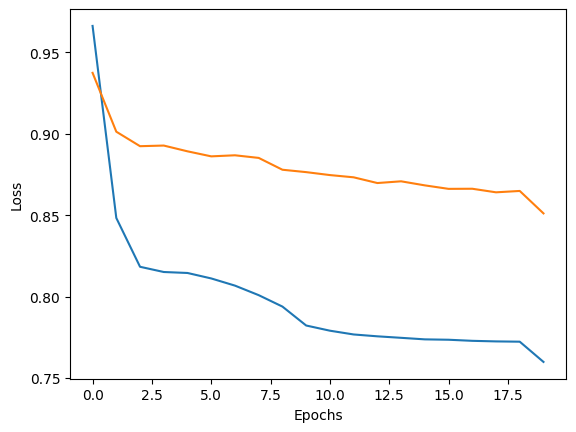

In [19]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()